In [93]:
# Importing Libraries

# Linear algebra
import numpy as np
 
# Data processing
import pandas as pd
 
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
 
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

%matplotlib inline
plt.rcParams['figure.figsize'] = 10,5 # Manipulating size of plots

In [94]:
# importing dataset

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**survival**: Survival
**PassengerId**: Unique Id of a passenger
**pclass**: Ticket class     
**sex**: Sex     
**Age**: Age in years     
**sibsp**: # of siblings / spouses aboard the Titanic     
**parch**: # of parents / children aboard the Titanic     
**ticket****: Ticket number     
**fare**: Passenger fare     
**cabin**: Cabin number     
**embarked**: Port of Embarkation

# 1. Exploratory Analysis

In [95]:
# dataset information

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
# dataset description

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
# Null values

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
# First 5 rows of dataset
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Visualisation

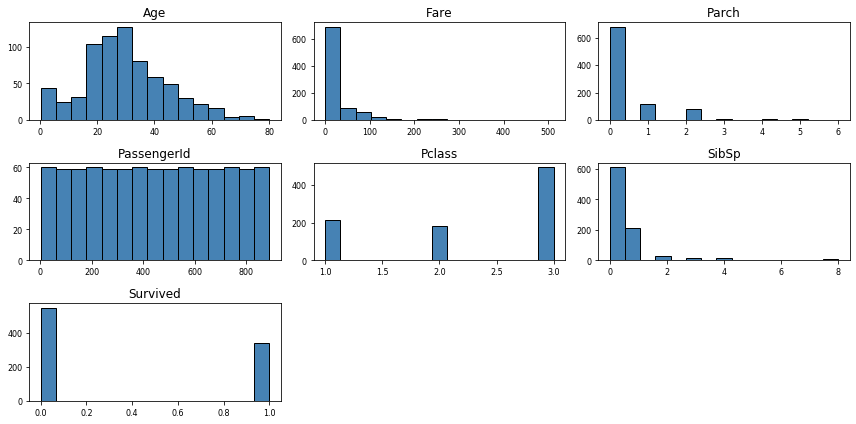

In [99]:
train_df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

In [100]:
train_df['Died'] = 1 - train_df['Survived']

In [101]:
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], 
    as_index = False).mean().sort_values(by = 'Survived', ascending = False))

print("\n")

print(train_df[['Sex', 'Survived']].groupby(['Sex'], 
    as_index = False).mean().sort_values(by = 'Survived', ascending = False))

print("\n")

print(train_df[['Embarked', 'Survived']].groupby(['Embarked'], 
    as_index = False).mean().sort_values(by = 'Survived', ascending = False))

print("\n")

print(train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))

print("\n")

print(train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


      Sex  Survived
0  female  0.742038
1    male  0.188908


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


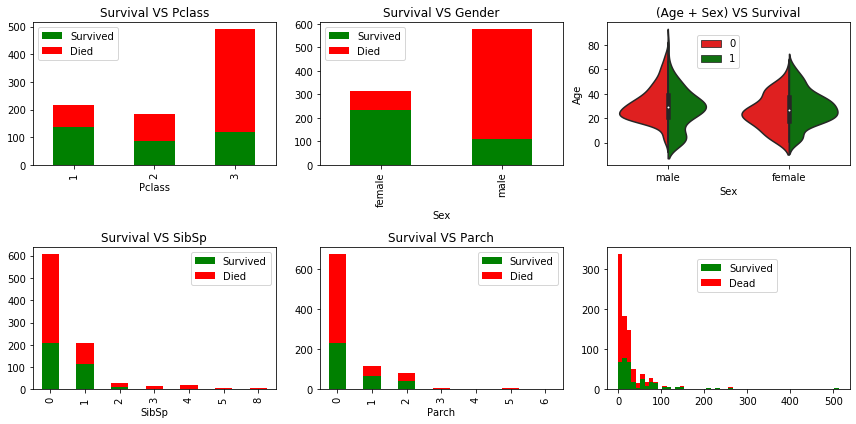

In [102]:
fig, axes = plt.subplots(2, 3, figsize = (25, 15))

fig.tight_layout(h_pad=20, w_pad=10)

ax1 = train_df.groupby('Pclass').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize = (10, 5), stacked = True, color = ['g', 'r'], ax = axes[0, 0]);
ax1.title.set_text('Survival VS Pclass')

ax2 = train_df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize = (10, 5), stacked = True, color = ['g', 'r'],  ax = axes[0, 1]);
ax2.title.set_text('Survival VS Gender')

ax3 = sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_df, split=True, palette={0: "r", 1: "g"}, ax = axes[0, 2]);
ax3.title.set_text('(Age + Sex) VS Survival')

ax5 = train_df.groupby('SibSp').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize = (10, 5), stacked = True, color = ['g', 'r'], ax = axes[1, 0]);
ax5.title.set_text('Survival VS SibSp')

ax6 = train_df.groupby('Parch').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize = (10, 5), stacked = True, color = ['g', 'r'], ax = axes[1, 1]);
ax6.title.set_text('Survival VS Parch')

axes[1,2] = plt.hist([train_df[train_df['Survived'] == 1]['Fare'], train_df[train_df['Survived'] == 0]['Fare']], stacked=True, color = ['g','r'], bins = 50, label = ['Survived','Dead']);

ax3.legend(loc="upper left", bbox_to_anchor=(0.35,0.95))
plt.legend(loc="upper left", bbox_to_anchor=(0.35,0.95))

plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

# 1. Upper Class people tend to survive.
2. Women are more linkely to survive than Men.
3. Not much inference
4. Not much inference

In [103]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# Observations

-- **Categorical**: Survived, Sex, and Embarked. **Ordinal**: Pclass. **Continous**: Age, Fare. Discrete: SibSp, Parch.

-- **Ticket** is a mix of numeric and alphanumeric data types. **Cabin** is alphanumeric.

-- 891 Passenger Entries

-- Age (177), Cabin (687) and Embarked (2) columns contain Null values.

-- The Survived column is the target variable. If Suvival = 1, the passenger survived, otherwise he's dead. That's the variable we're going to predict.

**Observations**

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.


**Decisions**

- We should consider Age (our assumption classifying #2) in our model training.
- Complete the Age feature for null values (completing #1).
- We should band age groups (creating #3).

# Data Preprocessing

In [104]:
train_df["Embarked"] = pd.Categorical(train_df["Embarked"]).codes
train_df["Sex"] = pd.Categorical(train_df["Sex"]).codes
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df["Sex"] = pd.Categorical(test_df["Sex"]).codes
test_df["Embarked"] = pd.Categorical(test_df["Embarked"]).codes


In [105]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0


In [106]:
# Splitting the dataset into the Training set and Test set
# X_train = train_df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
# y_train = train_df["Survived"]
# X_test  = test_df.drop("PassengerId", axis=1).copy()

X_train = train_df.iloc[:, [2, 4, 5, 6, 7, 9, 11]].values
y_train = train_df.iloc[:, 1].values
X_test = test_df.iloc[:, [1, 3, 4, 5, 6, 8, 10]].values
y_test = test_df.iloc[:, 1].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [107]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [108]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,NaN,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C105,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2
416,1308,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,NaN,2


In [109]:
X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [110]:
# 1. Logistic Regression

# Fitting the model
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter = 1000)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

acc_LR = round(classifier.score(X_train, y_train) * 100, 2) # mean accuracy on the given test data and labels

print("Predicted Y: \n", y_pred, "\n Logistic Regression Score: \n", acc_LR)

Predicted Y: 
 [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0] 
 Logistic Regression Score: 
 80.25


In [111]:
# 2. SVC

svc = SVC(gamma = "auto")
svc.fit(X_train, y_train)
Y_pred2 = svc.predict(X_test)
acc_SVC = round(svc.score(X_train, y_train) * 100, 2)

print("Predicted Y: \n", Y_pred2, "\n Logistic Regression Accuracy Score: \n", acc_SVC)

Predicted Y: 
 [0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0
 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 1] 
 Logistic Regression Accuracy Score: 
 89.34


In [112]:
# 3. KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred3 = knn.predict(X_test)
acc_KNN = round(knn.score(X_train, y_train) * 100, 2)

print("Predicted Y: \n", Y_pred2, "\n Logistic Regression Accuracy Score: \n", acc_KNN)

Predicted Y: 
 [0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0
 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 1] 
 Logistic Regression Accuracy Score: 
 83.84


In [113]:
# 4. Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred4 = gaussian.predict(X_test)
acc_NB = round(gaussian.score(X_train, y_train) * 100, 2)
print("Predicted Y: \n", Y_pred2, "\n Logistic Regression Accuracy Score: \n", acc_NB)

Predicted Y: 
 [0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0
 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 1] 
 Logistic Regression Accuracy Score: 
 79.24


In [114]:
# 5. Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred5 = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_RF = round(random_forest.score(X_train, y_train) * 100, 2)
print("Predicted Y: \n", Y_pred5, "\n Logistic Regression Accuracy Score: \n", acc_RF)

Predicted Y: 
 [0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1] 
 Logistic Regression Accuracy Score: 
 98.2


In [115]:
# Creating a dataframe with the Models and their mean accuracy scores

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVC', 'KNN', 'Naive Bayes', 'Random Forest'],
    'Score': [acc_LR, acc_SVC, acc_KNN, acc_NB, acc_RF]})

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,98.20
1,SVC,89.34
2,KNN,83.84
0,Logistic Regression,80.25
3,Naive Bayes,79.24


In [117]:
# Exporting the predicted output from RF algorithm

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred5
    })

# submission.to_csv('../output/submission.csv', index=False)